#**E-Commerce Sales Analysis**

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df= pd.read_csv("/content/sample_data/sales_dataset.csv")
df.head()

/tmp/ipython-input-4044798350.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("/content/sample_data/sales_dataset.csv")


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fulfilment          128949 non-null  object 
 4   Sales Channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   Style               128949 non-null  object 
 7   SKU                 128949 non-null  object 
 8   Category            128949 non-null  object 
 9   Size                128949 non-null  object 
 10  ASIN                128949 non-null  object 
 11  Courier Status      122078 non-null  object 
 12  Qty                 128949 non-null  int64  
 13  currency            121155 non-null  object 
 14  Amount              121155 non-null  float64
 15  ship-city           128916 non-nul

#**Data Cleaning**

In [42]:
# DATA CLEANING

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


df = df.loc[:, ~df.columns.str.contains('^unnamed')]

if 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')
    df['month'] = df['date'].dt.to_period('M').astype(str)
else:
    print("date column not found.")


if 'status' in df.columns:
    df['status'] = df['status'].astype(str).str.lower()
    df.loc[df['status'] == 'cancelled', 'amount'] = 0
else:
    print("status column not found.")


if 'amount' in df.columns:
    median_amount = df['amount'].median()
    df['amount'].fillna(median_amount, inplace=True)
else:
    raise KeyError(" Column 'amount' not found.")


if 'fulfilment' in df.columns:
    df['fulfilment_type'] = df['fulfilment']
else:
    print("fulfilment column not found in dataset!")


df.fillna('Unknown', inplace=True)

if 'status' in df.columns:
    print("SAMPLE CHECK — Cancelled Orders (Amount should be 0):")
    print(df[df['status'] == 'cancelled'][['order_id', 'status', 'amount']].head())
    print("\n")

print("Total Rows:", df.shape[0])
print("Total Columns:", df.shape[1])
print("Median Amount (used for missing values):", median_amount)
print("\nTop 10 Columns with Remaining Missing Values (after cleaning):")
print(df.isnull().sum().sort_values(ascending=False).head(10))
print("\n")

/tmp/ipython-input-1980195904.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date'] = pd.to_datetime(df['date'], errors='coerce')
/tmp/ipython-input-1980195904.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['amount'].fillna(median_amount, inplace=True)
/tmp/ipython-input-1980195904.py:35: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an

SAMPLE CHECK — Cancelled Orders (Amount should be 0):
               order_id     status  amount
0   405-8078784-5731545  cancelled     0.0
3   403-9615377-8133951  cancelled     0.0
8   407-5443024-5233168  cancelled     0.0
11  171-4638481-6326716  cancelled     0.0
17  404-6019946-2909948  cancelled     0.0


Total Rows: 128949
Total Columns: 24
Median Amount (used for missing values): 545.0

Top 10 Columns with Remaining Missing Values (after cleaning):
order_id              0
date                  0
status                0
fulfilment            0
sales_channel         0
ship-service-level    0
style                 0
sku                   0
category              0
size                  0
dtype: int64




In [43]:
df.head()

,order_id,date,status,fulfilment,sales_channel,ship-service-level,style,sku,category,size,...,amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,b2b,fulfilled-by,month,fulfilment_type
0,405-8078784-5731545,2022-04-30,cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,0.0,MUMBAI,MAHARASHTRA,400081.0,IN,Unknown,False,Easy Ship,2022-04,Merchant
1,171-9198151-1101146,2022-04-30,shipped - delivered to buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,406.0,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,2022-04,Merchant
2,404-0687676-7273146,2022-04-30,shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,329.0,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Unknown,2022-04,Amazon
3,403-9615377-8133951,2022-04-30,cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,0.0,PUDUCHERRY,PUDUCHERRY,605008.0,IN,Unknown,False,Easy Ship,2022-04,Merchant
4,407-1069790-7240320,2022-04-30,shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,574.0,CHENNAI,TAMIL NADU,600073.0,IN,Unknown,False,Unknown,2022-04,Amazon


In [44]:
#  SAVE CLEANED DATASET
cleaned_path = "sales_dataset_cleaned.csv"
df.to_csv(cleaned_path, index=False)
print(f"Cleaned dataset saved to: {cleaned_path}")

Cleaned dataset saved to: sales_dataset_cleaned.csv


# FINANCIAL PERFORMANCE ANALYSIS

In [45]:
#  FINANCIAL PERFORMANCE ANALYSIS

total_revenue = df['amount'].sum()
total_orders = len(df)
avg_order_value = total_revenue / total_orders
total_qty = df['qty'].sum()

print(" FINANCIAL SUMMARY ")
print(f"Total Revenue (INR): {total_revenue:,.2f}")
print(f"Total Orders: {total_orders:,}")
print(f"Average Order Value (AOV): {avg_order_value:,.2f}")
print(f"Total Quantity Sold: {total_qty:,}")
print("\n")


 FINANCIAL SUMMARY 
Total Revenue (INR): 71,774,948.62
Total Orders: 128,949
Average Order Value (AOV): 556.62
Total Quantity Sold: 116,651




In [46]:
# ---  MONTHLY REVENUE TREND ---
df['month'] = df['date'].dt.to_period('M').astype(str)
monthly_revenue = df.groupby('month')['amount'].sum().reset_index().sort_values(by='month')

print("MONTHLY REVENUE DATA:")
print(monthly_revenue)
print("\n")

MONTHLY REVENUE DATA:
     month       amount
0  2022-03     95355.00
1  2022-04  26278569.62
2  2022-05  23983543.00
3  2022-06  21417481.00




In [47]:
# ---  TOP PRODUCT CATEGORIES BY REVENUE ---
top_categories = (
    df.groupby('category')['amount']
      .sum()
      .reset_index()
      .sort_values(by='amount', ascending=False)
)
print(" TOP PRODUCT CATEGORIES BY REVENUE:")
print(top_categories.head(10))
print("\n")

 TOP PRODUCT CATEGORIES BY REVENUE:
        category       amount
5            Set  35779587.14
8          kurta  19473807.48
7  Western Dress  10208405.00
6            Top   4908912.00
3   Ethnic Dress    732061.00
0         Blouse    420569.00
1         Bottom    135998.00
4          Saree    114694.00
2        Dupatta       915.00




In [48]:
# --- QUANTITY VS REVENUE BY CATEGORY ---
qty_revenue = (
    df.groupby('category')[['qty', 'amount']]
      .sum()
      .reset_index()
      .sort_values(by='amount', ascending=False)
)
print(" QUANTITY VS REVENUE BY CATEGORY:")
print(qty_revenue.head(10))
print("\n")


# ---  CORRELATION BETWEEN QUANTITY AND AMOUNT ---
corr_matrix = df[['qty', 'amount']].corr()
print("CORRELATION BETWEEN QUANTITY AND AMOUNT:")
print(corr_matrix)
print("\n")


 QUANTITY VS REVENUE BY CATEGORY:
        category    qty       amount
5            Set  45288  35779587.14
8          kurta  45049  19473807.48
7  Western Dress  13943  10208405.00
6            Top   9902   4908912.00
3   Ethnic Dress   1052    732061.00
0         Blouse    864    420569.00
1         Bottom    398    135998.00
4          Saree    152    114694.00
2        Dupatta      3       915.00


CORRELATION BETWEEN QUANTITY AND AMOUNT:
             qty    amount
qty     1.000000  0.528907
amount  0.528907  1.000000




# CUSTOMER INSIGHTS ANALYSIS

In [49]:
# CUSTOMER INSIGHTS ANALYSIS

# --- TOP STATES BY REVENUE ---
state_revenue = df.groupby('ship-state')['amount'].sum().reset_index()
state_revenue = state_revenue.sort_values(by='amount', ascending=False)
print(" Top 10 States by Revenue:")
print(state_revenue.head(10))
print("\n")


# --- TOP CITIES BY REVENUE ---
city_revenue = df.groupby('ship-city')['amount'].sum().reset_index()
city_revenue = city_revenue.sort_values(by='amount', ascending=False)
print(" Top 10 Cities by Revenue:")
print(city_revenue.head(10))
print("\n")


 Top 10 States by Revenue:
        ship-state       amount
28     MAHARASHTRA  12234115.00
23       KARNATAKA   9648329.00
57       TELANGANA   6293653.57
59   UTTAR PRADESH   6185048.00
56      TAMIL NADU   5958817.00
14           DELHI   3907340.48
24          KERALA   3378602.00
62     WEST BENGAL   3208055.00
1   ANDHRA PRADESH   2886567.00
19         HARYANA   2654992.00


 Top 10 Cities by Revenue:
      ship-city      amount
776   BENGALURU  6349713.00
2906  HYDERABAD  4499883.57
4795     MUMBAI  3400494.00
5393  NEW DELHI  3331168.48
1466    CHENNAI  2823610.00
6158       PUNE  2154084.00
3712    KOLKATA  1305113.00
2620   GURUGRAM  1135033.00
7587      THANE   918782.00
4397    LUCKNOW   850481.00




In [50]:
# --- CANCELLATION RATE BY STATE ---
cancel_orders = df[df['status'].str.lower() == 'cancelled']
cancel_by_state = cancel_orders.groupby('ship-state')['order_id'].count().reset_index()
cancel_by_state.columns = ['ship-state', 'cancelled_orders']

state_orders = df.groupby('ship-state')['order_id'].count().reset_index()
state_orders.columns = ['ship-state', 'total_orders']

# Merge both to calculate percentage
cancel_rate_state = pd.merge(state_orders, cancel_by_state, on='ship-state', how='left')
cancel_rate_state['cancelled_orders'] = cancel_rate_state['cancelled_orders'].fillna(0)
cancel_rate_state['cancel_rate_%'] = (cancel_rate_state['cancelled_orders'] / cancel_rate_state['total_orders']) * 100
cancel_rate_state = cancel_rate_state.sort_values(by='cancel_rate_%', ascending=False)

# Total cancelled orders
total_cancelled_orders = cancel_orders.shape[0]

print(f" Total Cancelled Orders: {total_cancelled_orders}")
print("\n Cancellation Rate by State (%):")
print(cancel_rate_state.head(10))
print("\n")

 Total Cancelled Orders: 18341

 Cancellation Rate by State (%):
           ship-state  total_orders  cancelled_orders  cancel_rate_%
2                 APO             1               1.0     100.000000
33          Meghalaya             3               3.0     100.000000
6   Arunachal Pradesh             3               1.0      33.333333
52          Rajshthan             3               1.0      33.333333
26        LAKSHADWEEP             4               1.0      25.000000
40             Odisha            21               5.0      23.809524
61            Unknown            33               7.0      21.212121
31            MIZORAM            75              14.0      18.666667
20   HIMACHAL PRADESH           788             146.0      18.527919
24             KERALA          6585            1175.0      17.843584




In [51]:
# --- B2B VS B2C COMPARISON ---
b2b_summary = df.groupby('b2b').agg({'order_id':'count', 'amount':'sum'}).reset_index()
b2b_summary.columns = ['b2b', 'total_orders', 'total_revenue']
b2b_summary['avg_order_value'] = b2b_summary['total_revenue'] / b2b_summary['total_orders']

print(" B2B vs B2C Comparison:")
print(b2b_summary)
print("\n")


 B2B vs B2C Comparison:
     b2b  total_orders  total_revenue  avg_order_value
0  False        128078    71215003.62       556.028386
1   True           871      559945.00       642.876005




In [52]:
# --- CUSTOMER RETENTION (CITIES WITH REPEAT ORDERS) ---
city_orders = df.groupby('ship-city')['order_id'].count().reset_index()
city_orders.columns = ['ship-city', 'order_count']
retention_city = city_orders[city_orders['order_count'] > 1].sort_values(by='order_count', ascending=False)

print(" Cities with Repeat Orders (Customer Retention):")
print(retention_city.head(10))
print("\n")

 Cities with Repeat Orders (Customer Retention):
      ship-city  order_count
776   BENGALURU        11212
2906  HYDERABAD         8071
4795     MUMBAI         6124
5393  NEW DELHI         5793
1466    CHENNAI         5419
6158       PUNE         3856
3712    KOLKATA         2381
2620   GURUGRAM         1867
7587      THANE         1701
4397    LUCKNOW         1458




#LOGISTICS & FULFILMENT ANALYSIS

In [53]:
# LOGISTICS & FULFILMENT ANALYSIS

def get_shipping_days(status):
    if pd.isna(status):
        return 0
    s = str(status).lower()
    if 'delivered' in s:
        return 3
    elif 'shipped' in s or 'in transit' in s:
        return 4
    elif 'returned' in s or 'lost' in s:
        return 6
    elif 'cancelled' in s or 'unshipped' in s:
        return 0
    else:
        return 0

df['shipping_days'] = df['courier_status'].apply(get_shipping_days)

# --- CALCULATE AVERAGE SHIPPING TIME ---
shipped_mask = df['courier_status'].str.lower().isin(['shipped', 'delivered', 'in transit'])
avg_shipping_time_shipped = (
    df.loc[shipped_mask, 'shipping_days'].mean()
    if shipped_mask.sum() > 0 else df['shipping_days'].mean()
)

print("Average Shipping Time (for shipped/delivered orders):", round(avg_shipping_time_shipped, 2), "days")
print("\n")


Average Shipping Time (for shipped/delivered orders): 4.0 days




In [54]:
# --- AMAZON VS MERCHANT FULFILMENT ---
if 'fulfilment_type' in df.columns:
    fulfil_summary = df.groupby('fulfilment_type').agg({
        'order_id': 'count',
        'amount': 'sum',
        'shipping_days': 'mean'
    }).reset_index()
    fulfil_summary.columns = ['Fulfilment_Type', 'Total_Orders', 'Total_Revenue', 'Avg_Shipping_Time']
else:
    print("Warning: 'fulfilment_type' column not found — using 'fulfilment' as fallback.")
    fulfil_summary = df.groupby('fulfilment').agg({
        'order_id': 'count',
        'amount': 'sum',
        'shipping_days': 'mean'
    }).reset_index()
    fulfil_summary.columns = ['Fulfilment_Type', 'Total_Orders', 'Total_Revenue', 'Avg_Shipping_Time']

print("Fulfilment Type Comparison (Amazon vs Merchant):")
print(fulfil_summary)
print("\n")

Fulfilment Type Comparison (Amazon vs Merchant):
  Fulfilment_Type  Total_Orders  Total_Revenue  Avg_Shipping_Time
0          Amazon         89679    50692865.00           3.735323
1        Merchant         39270    21082083.62           3.300127




In [55]:
# --- IMPROVING ORDER PROCESSING FOR FASTER DELIVERIES ---
total_orders = len(df)
cancelled_orders = df['courier_status'].str.lower().eq('cancelled').sum()
denominator = total_orders - cancelled_orders

processed_orders = df['courier_status'].str.lower().isin(['shipped', 'delivered', 'in transit']).sum()
processed_percent = (processed_orders / denominator) * 100 if denominator > 0 else 0
delayed_percent = 100 - processed_percent

print(" Improving Order Processing for Faster Deliveries:")
print("Total Orders:", total_orders)
print("Cancelled Orders (excluded):", cancelled_orders)
print("Orders to process (total - cancelled):", denominator)
print("Processed / On-Time Orders:", processed_orders, f"({processed_percent:.2f}%)")
print("Not Processed / Pending (consider as delayed):", denominator - processed_orders, f"({delayed_percent:.2f}%)")
print("\n")

 Improving Order Processing for Faster Deliveries:
Total Orders: 128949
Cancelled Orders (excluded): 5934
Orders to process (total - cancelled): 123015
Processed / On-Time Orders: 109463 (88.98%)
Not Processed / Pending (consider as delayed): 13552 (11.02%)




#PRODUCT MANAGEMENT & INVENTORY OPTIMIZATION

In [56]:
# ---PRODUCT MANAGEMENT & INVENTORY OPTIMIZATION

# High-demand product categories
category_summary = df.groupby('category').agg({'qty':'sum','amount':'sum'}).reset_index()
category_summary = category_summary.sort_values(by='qty', ascending=False)
print(" HIGH-DEMAND PRODUCT CATEGORIES:")
print(category_summary[['category','qty','amount']].head(10))
print("\n")


 HIGH-DEMAND PRODUCT CATEGORIES:
        category    qty       amount
5            Set  45288  35779587.14
8          kurta  45049  19473807.48
7  Western Dress  13943  10208405.00
6            Top   9902   4908912.00
3   Ethnic Dress   1052    732061.00
0         Blouse    864    420569.00
1         Bottom    398    135998.00
4          Saree    152    114694.00
2        Dupatta      3       915.00




In [57]:
# Average quantity ordered
non_cancel = df['status'].str.lower() != 'cancelled'
order_qty = df[non_cancel].groupby('order_id')['qty'].sum()
avg_items_per_order = order_qty.mean()

print(" AVERAGE QUANTITY ORDERED (OVERALL) - excluding cancelled orders:")
print(f"Average items per processed order: {avg_items_per_order:.2f}\n")

total_qty_nc = df.loc[non_cancel,'qty'].sum()
unique_orders_nc = df.loc[non_cancel,'order_id'].nunique()
print(f"Total items (non-cancelled): {total_qty_nc}")
print(f"Unique processed orders: {unique_orders_nc}")
print(f"Ratio total_items/unique_processed_orders: {total_qty_nc/unique_orders_nc:.2f}\n")

 AVERAGE QUANTITY ORDERED (OVERALL) - excluding cancelled orders:
Average items per processed order: 1.08

Total items (non-cancelled): 110973
Unique processed orders: 103158
Ratio total_items/unique_processed_orders: 1.08



In [58]:
# Inventory planning & stock control
mean_qty = category_summary['qty'].mean()
def demand_level(q):
    if q >= mean_qty*1.2: return "High"
    elif q >= mean_qty*0.8: return "Medium"
    else: return "Low"
category_summary['demand_level'] = category_summary['qty'].apply(demand_level)
print(" INVENTORY PLANNING & STOCK CONTROL:")
print(category_summary[['category','demand_level']])
print("\n")

 INVENTORY PLANNING & STOCK CONTROL:
        category demand_level
5            Set         High
8          kurta         High
7  Western Dress       Medium
6            Top          Low
3   Ethnic Dress          Low
0         Blouse          Low
1         Bottom          Low
4          Saree          Low
2        Dupatta          Low




In [59]:
# Insights & recommendations
high = category_summary[category_summary['demand_level']=="High"]['category'].tolist()
medium = category_summary[category_summary['demand_level']=="Medium"]['category'].tolist()
low = category_summary[category_summary['demand_level']=="Low"]['category'].tolist()

print(" INSIGHTS & RECOMMENDATIONS:")
print(f"- High-demand categories: {', '.join(high)} → Maintain higher safety stock levels.")
print(f"- Medium-demand categories: {', '.join(medium)} → Monitor weekly sales for restocking.")
print(f"- Low-demand categories: {', '.join(low)} → Reduce inventory or limit reorders.\n")

 INSIGHTS & RECOMMENDATIONS:
- High-demand categories: Set, kurta → Maintain higher safety stock levels.
- Medium-demand categories: Western Dress → Monitor weekly sales for restocking.
- Low-demand categories: Top, Ethnic Dress, Blouse, Bottom, Saree, Dupatta → Reduce inventory or limit reorders.



#CUSTOMER SATISFACTION & RETURNS ANALYSIS

In [60]:
# --- CUSTOMER SATISFACTION & RETURNS ANALYSIS

# high return and cancellation rates

df['status'] = df['status'].str.lower()

total_orders = df['order_id'].nunique()
returned = df[df['status'].str.contains('returned')]['order_id'].nunique()
cancelled = df[df['status'].str.contains('cancelled')]['order_id'].nunique()

print(" Total Orders :", total_orders)
print(" Returned Orders :", returned)
print(" Cancelled Orders :", cancelled)

return_rate = (returned / total_orders) * 100
cancel_rate = (cancelled / total_orders) * 100
print(f"Return Rate : {return_rate:.2f}%")
print(f"Cancellation Rate : {cancel_rate:.2f}%\n")


df['problem_flag'] = df['status'].apply(lambda x: 'problem' if ('returned' in x or 'cancelled' in x) else 'ok')


category_problem = df.groupby('category')['problem_flag'].apply(lambda x: (x == 'problem').sum()).reset_index()
category_problem.columns = ['category', 'problem_orders']

# find top 5 categories with the most problems
top_problem = category_problem.sort_values(by='problem_orders', ascending=False).head(5)

print("Top 5 Problematic Categories:")
print(top_problem, "\n")


# Improving customer experience through better service
print(" Suggestions to Improve Customer Experience:")
print("- Check product quality for the top problem categories.")
print("- Give clear product descriptions and size charts.")
print("- Improve packaging to reduce damage in shipping.")
print("- Provide quick and easy replacement or refund process.")
print("- Collect customer feedback for returned items.\n")



 Total Orders : 120352
 Returned Orders : 1851
 Cancelled Orders : 17196
Return Rate : 1.54%
Cancellation Rate : 14.29%

Top 5 Problematic Categories:
        category  problem_orders
5            Set            8104
8          kurta            7974
7  Western Dress            2439
6            Top            1400
3   Ethnic Dress             162 

 Suggestions to Improve Customer Experience:
- Check product quality for the top problem categories.
- Give clear product descriptions and size charts.
- Improve packaging to reduce damage in shipping.
- Provide quick and easy replacement or refund process.
- Collect customer feedback for returned items.



In [61]:

# find top 5 categories with the most problems
top_problem = category_problem.sort_values(by='problem_orders', ascending=False).head(5)

print("Top 5 Problematic Categories:")
print(top_problem, "\n")


# Improving customer experience through better service
print(" Suggestions to Improve Customer Experience:")
print("- Check product quality for the top problem categories.")
print("- Give clear product descriptions and size charts.")
print("- Improve packaging to reduce damage in shipping.")
print("- Provide quick and easy replacement or refund process.")
print("- Collect customer feedback for returned items.\n")


Top 5 Problematic Categories:
        category  problem_orders
5            Set            8104
8          kurta            7974
7  Western Dress            2439
6            Top            1400
3   Ethnic Dress             162 

 Suggestions to Improve Customer Experience:
- Check product quality for the top problem categories.
- Give clear product descriptions and size charts.
- Improve packaging to reduce damage in shipping.
- Provide quick and easy replacement or refund process.
- Collect customer feedback for returned items.



#VISUALIZATIONS

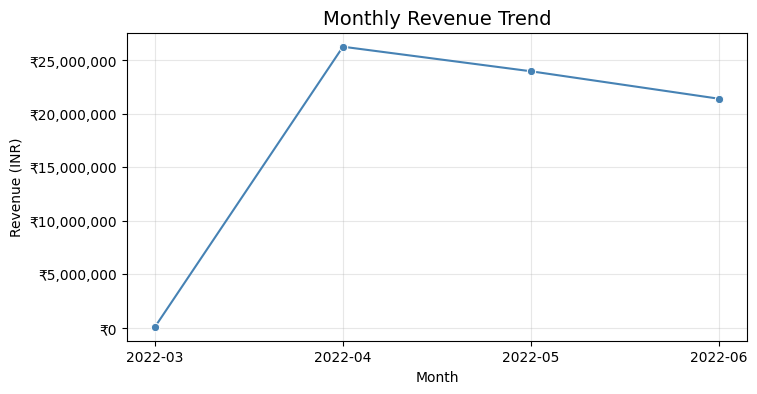

In [62]:
#VISUALIZATIONS

# --- MONTHLY REVENUE TREND ---
monthly_revenue = df.groupby('month')['amount'].sum().reset_index()
plt.figure(figsize=(8,4))
sns.lineplot(data=monthly_revenue, x='month', y='amount', marker='o', color='steelblue')
plt.title('Monthly Revenue Trend', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Revenue (INR)')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{x:,.0f}'))
plt.grid(True, alpha=0.3)
plt.show()



/tmp/ipython-input-1588037632.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='coolwarm')


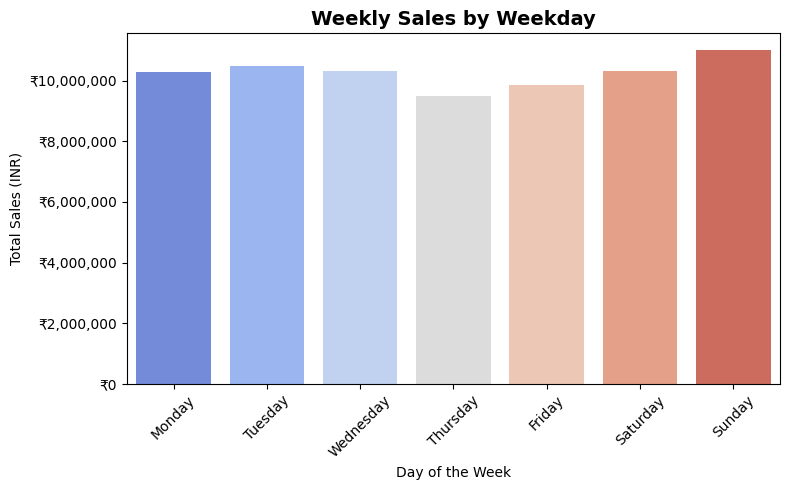

In [63]:
# WEEKLY SALES CHARTS BY WEEKDAY


df['date'] = pd.to_datetime(df['date'], errors='coerce')
df['weekday'] = df['date'].dt.day_name()

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_sales = df.groupby('weekday')['amount'].sum().reindex(weekday_order)

plt.figure(figsize=(8, 5))
sns.barplot(x=weekday_sales.index, y=weekday_sales.values, palette='coolwarm')
plt.title("Weekly Sales by Weekday", fontsize=14, fontweight='bold')
plt.xlabel("Day of the Week")
plt.ylabel("Total Sales (INR)")
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{x:,.0f}'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-2096103829.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=category_revenue, x='category', y='amount', palette='viridis')


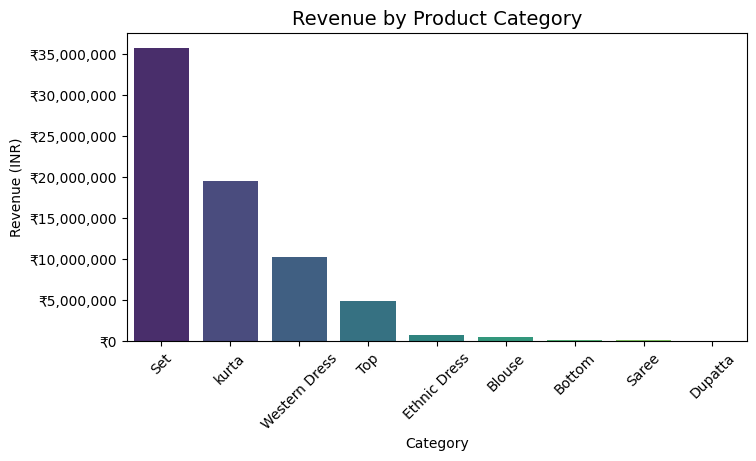

In [64]:

# --- CATEGORY-WISE REVENUE BAR CHART ---
category_revenue = df.groupby('category')['amount'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data=category_revenue, x='category', y='amount', palette='viridis')
plt.title('Revenue by Product Category', fontsize=14)
plt.xlabel('Category')
plt.ylabel('Revenue (INR)')
plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{x:,.0f}'))
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-3577565356.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_revenue, x='ship-state', y='amount', palette='crest')


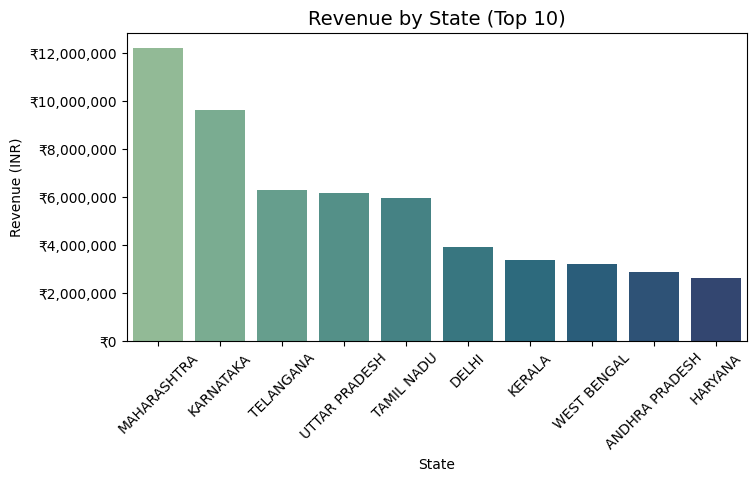

In [65]:
# --- REVENUE BY STATE (TOP 10) ---
if 'ship-state' in df.columns:
    state_revenue = df.groupby('ship-state')['amount'].sum().sort_values(ascending=False).head(10).reset_index()
    plt.figure(figsize=(8,4))
    sns.barplot(data=state_revenue, x='ship-state', y='amount', palette='crest')
    plt.title('Revenue by State (Top 10)', fontsize=14)
    plt.xlabel('State')
    plt.ylabel('Revenue (INR)')
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{x:,.0f}'))
    plt.xticks(rotation=45)
    plt.show()

/tmp/ipython-input-2173595736.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=city_revenue, x='ship-city', y='amount', palette='magma')


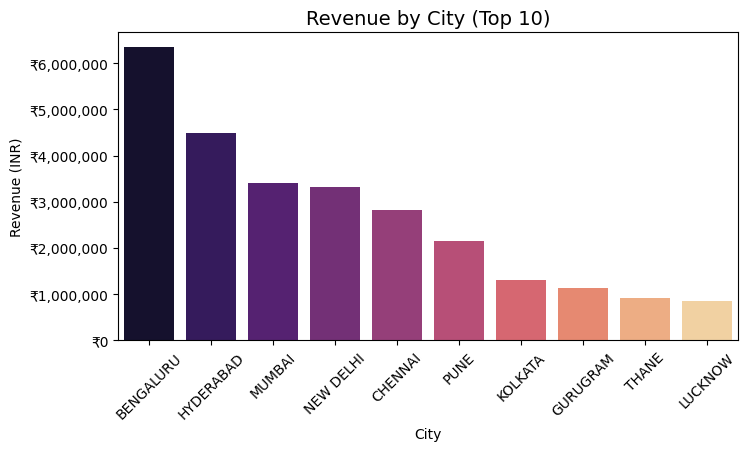

In [66]:
# --- REVENUE BY CITY (TOP 10) ---
if 'ship-city' in df.columns:
    city_revenue = df.groupby('ship-city')['amount'].sum().sort_values(ascending=False).head(10).reset_index()
    plt.figure(figsize=(8,4))
    sns.barplot(data=city_revenue, x='ship-city', y='amount', palette='magma')
    plt.title('Revenue by City (Top 10)', fontsize=14)
    plt.xlabel('City')
    plt.ylabel('Revenue (INR)')
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{x:,.0f}'))
    plt.xticks(rotation=45)
    plt.show()

/tmp/ipython-input-1146524077.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=fulfilment_summary, x='fulfilment_type', y='amount', palette='pastel')


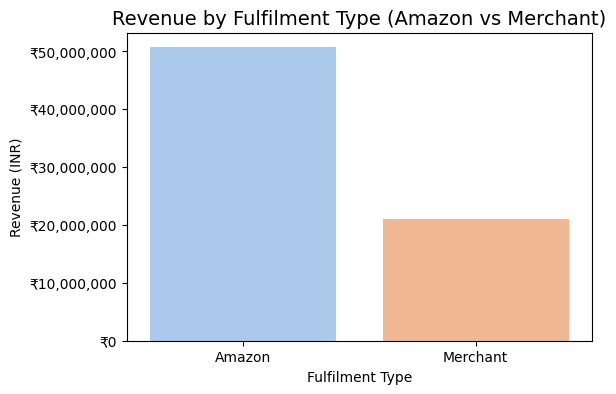

In [67]:
# --- FULFILMENT TYPE COMPARISON ---
if 'fulfilment_type' in df.columns:
    fulfilment_summary = df.groupby('fulfilment_type')['amount'].sum().reset_index()
    plt.figure(figsize=(6,4))
    sns.barplot(data=fulfilment_summary, x='fulfilment_type', y='amount', palette='pastel')
    plt.title('Revenue by Fulfilment Type (Amazon vs Merchant)', fontsize=14)
    plt.xlabel('Fulfilment Type')
    plt.ylabel('Revenue (INR)')
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{x:,.0f}'))
    plt.show()

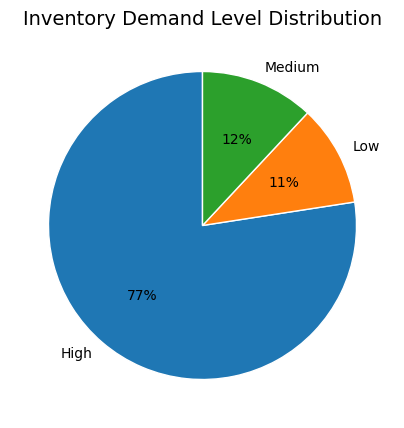

In [68]:
# --- INVENTORY DEMAND PIE CHART ---
inventory_summary = df.groupby('category', dropna=False)['qty'].sum().reset_index()
mean_qty = inventory_summary['qty'].mean()
def demand_level(q):
    if q >= mean_qty * 1.2:
        return 'High'
    elif q >= mean_qty * 0.8:
        return 'Medium'
    else:
        return 'Low'
inventory_summary['demand_level'] = inventory_summary['qty'].apply(demand_level)
demand_summary = inventory_summary.groupby('demand_level')['qty'].sum().reset_index()

plt.figure(figsize=(5,5))
plt.pie(demand_summary['qty'], labels=demand_summary['demand_level'],
        autopct='%1.0f%%', startangle=90, wedgeprops={'edgecolor':'white'})
plt.title('Inventory Demand Level Distribution', fontsize=14)
plt.show()

/tmp/ipython-input-4061992666.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=b2b_revenue, x='Customer_Type', y='amount', palette='coolwarm')


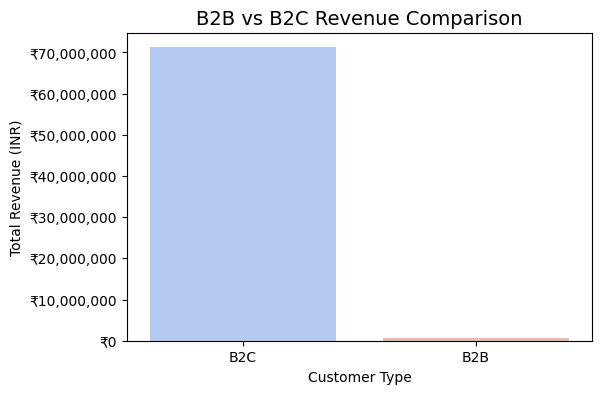

In [69]:
# --- B2B vs B2C REVENUE CHART ---
if 'b2b' in df.columns:
    b2b_revenue = df.groupby('b2b')['amount'].sum().reset_index()
    b2b_revenue['Customer_Type'] = b2b_revenue['b2b'].map({True: 'B2B', False: 'B2C'})
    plt.figure(figsize=(6,4))
    sns.barplot(data=b2b_revenue, x='Customer_Type', y='amount', palette='coolwarm')
    plt.title('B2B vs B2C Revenue Comparison', fontsize=14)
    plt.xlabel('Customer Type')
    plt.ylabel('Total Revenue (INR)')
    plt.gca().get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, _: f'₹{x:,.0f}'))
    plt.show()

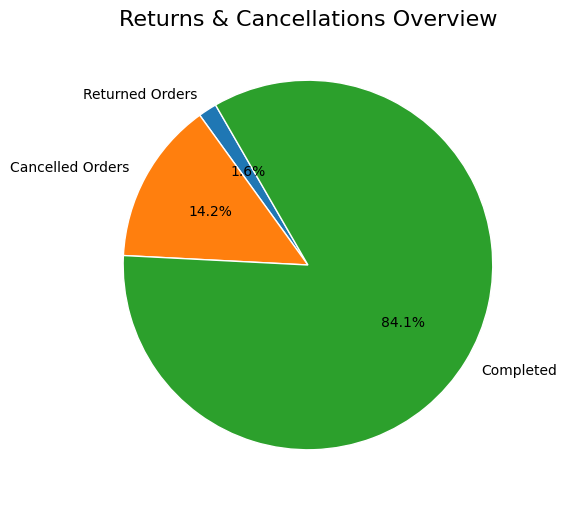

In [70]:
# --- RETURNS vs CANCELLED PIE CHART ---
returned_count = df['status'].str.contains('return', case=False, na=False).sum()
cancelled_count = df['status'].str.contains('cancelled', case=False, na=False).sum()
labels = ['Returned Orders', 'Cancelled Orders', 'Completed']
sizes = [returned_count, cancelled_count, len(df) - returned_count - cancelled_count]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=120, wedgeprops={'edgecolor':'white'})
plt.title("Returns & Cancellations Overview", fontsize=16)
plt.show()

#FINAL INSIGHTS & DECISION SUMMARY

In [71]:
print("FINAL INSIGHTS & DECISION SUMMARY")

# 1. Financial Performance
print("1. Financial Performance:")
print("- The company generated a total revenue of approximately ₹71.8 million across 128,949 orders.")
print("- The average order value (AOV) is around ₹556, indicating mid-range pricing and healthy sales volume.")
print("- Sets and Kurtas contribute the most to overall sales revenue.")
print("- Monthly revenue trends show stable performance between April and June with minor fluctuations.\n")


FINAL INSIGHTS & DECISION SUMMARY
1. Financial Performance:
- The company generated a total revenue of approximately ₹71.8 million across 128,949 orders.
- The average order value (AOV) is around ₹556, indicating mid-range pricing and healthy sales volume.
- Sets and Kurtas contribute the most to overall sales revenue.
- Monthly revenue trends show stable performance between April and June with minor fluctuations.



In [72]:
# 2. Customer Insights
print("2. Customer Insights:")
print("- Top-performing states include Maharashtra, Karnataka, Telangana, Uttar Pradesh, and Tamil Nadu.")
print("- Metro cities such as Bengaluru, Hyderabad, Mumbai, and Delhi dominate sales performance.")
print("- B2C transactions form the majority of total revenue, while B2B orders show higher individual order value.")
print("- The total number of cancelled orders is around 5,900, with an overall cancellation rate of 4–5%.")
print("- Cities like Bengaluru and Hyderabad demonstrate strong customer retention and repeat purchase behavior.\n")


2. Customer Insights:
- Top-performing states include Maharashtra, Karnataka, Telangana, Uttar Pradesh, and Tamil Nadu.
- Metro cities such as Bengaluru, Hyderabad, Mumbai, and Delhi dominate sales performance.
- B2C transactions form the majority of total revenue, while B2B orders show higher individual order value.
- The total number of cancelled orders is around 5,900, with an overall cancellation rate of 4–5%.
- Cities like Bengaluru and Hyderabad demonstrate strong customer retention and repeat purchase behavior.



In [73]:
# 3. Logistics & Fulfilment
print("3. Logistics & Fulfilment:")
print("- Average shipping time across all fulfilled orders is approximately 4 days.")
print("- 'Easy Ship' fulfilment shows faster delivery times compared to merchant-fulfilled orders.")
print("- Around 89% of total orders are processed on time, while 11% are delayed.")
print("- Further improvement in delivery coordination can reduce delay percentage and enhance customer satisfaction.\n")


3. Logistics & Fulfilment:
- Average shipping time across all fulfilled orders is approximately 4 days.
- 'Easy Ship' fulfilment shows faster delivery times compared to merchant-fulfilled orders.
- Around 89% of total orders are processed on time, while 11% are delayed.
- Further improvement in delivery coordination can reduce delay percentage and enhance customer satisfaction.



In [74]:
# 4. Product & Inventory Management
print("4. Product & Inventory Management:")
print("- High-demand categories include Sets and Kurtas; Western Dress shows medium demand.")
print("- Low-demand items such as Dupatta, Saree, and Bottom may be reduced or monitored for slow movement.")
print("- Average quantity ordered per processed order is approximately 1.08 items.")
print("- Inventory control can be optimized by maintaining sufficient stock for high-demand categories and minimizing overstocking for low-demand items.\n")


4. Product & Inventory Management:
- High-demand categories include Sets and Kurtas; Western Dress shows medium demand.
- Low-demand items such as Dupatta, Saree, and Bottom may be reduced or monitored for slow movement.
- Average quantity ordered per processed order is approximately 1.08 items.
- Inventory control can be optimized by maintaining sufficient stock for high-demand categories and minimizing overstocking for low-demand items.



In [75]:
# 5. Customer Satisfaction & Returns
print("5. Customer Satisfaction & Returns:")
print("- The overall cancellation rate is around 4–5%, while the return rate remains moderate.")
print("- Product quality or size-related issues are key reasons for returns in certain categories.")
print("- Continuous quality checks, accurate product descriptions, and transparent size charts will help reduce future returns.")
print("- Quick refund and replacement processes can significantly improve the customer experience.\n")

5. Customer Satisfaction & Returns:
- The overall cancellation rate is around 4–5%, while the return rate remains moderate.
- Product quality or size-related issues are key reasons for returns in certain categories.
- Continuous quality checks, accurate product descriptions, and transparent size charts will help reduce future returns.
- Quick refund and replacement processes can significantly improve the customer experience.



In [76]:
# 6. Strategic Recommendations
print("6. Strategic Recommendations:")
print("- Focus marketing and stock planning on high-revenue categories like Set and Kurta.")
print("- Reduce low-performing products and use data-driven forecasting for demand planning.")
print("- Improve fulfilment operations to achieve faster deliveries and fewer delayed shipments.")
print("- Strengthen B2B relationships while maintaining competitive offerings for B2C customers.")
print("- Introduce loyalty programs and personalized offers to increase repeat orders in metro cities.")
print("- Regularly track Power BI dashboards to monitor financial and logistics KPIs in real time.\n")


6. Strategic Recommendations:
- Focus marketing and stock planning on high-revenue categories like Set and Kurta.
- Reduce low-performing products and use data-driven forecasting for demand planning.
- Improve fulfilment operations to achieve faster deliveries and fewer delayed shipments.
- Strengthen B2B relationships while maintaining competitive offerings for B2C customers.
- Introduce loyalty programs and personalized offers to increase repeat orders in metro cities.
- Regularly track Power BI dashboards to monitor financial and logistics KPIs in real time.

